# mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow
from tensorflow.keras.utils import to_categorical

%matplotlib inline

# load data

In [38]:
labels = pd.read_csv('/content/drive/MyDrive/Signs Dataset/Copy of label_names.csv')
train = pd.read_pickle('/content/drive/MyDrive/Signs Dataset/Copy of train.pickle')
test = pd.read_pickle('/content/drive/MyDrive/Signs Dataset/Copy of test.pickle')
valid = pd.read_pickle('/content/drive/MyDrive/Signs Dataset/Copy of valid.pickle')



#show data

41 36 23 
1 1 37 
3 4 4 


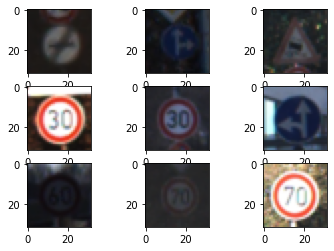

In [ ]:
for i in range(9):
    img = train['features'][i*1000]
    print(train['labels'][i*1000], end= ' ')
    if i%3 == 2:
      print()
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(img)

# spliting data

In [ ]:
trainX = train['features']
trainY = to_categorical(train['labels'])
valX = valid['features']
valY = to_categorical(valid['labels'])
testX = test['features']
testY = to_categorical(test['labels'])

trainY.shape

(34799, 43)

# import keras libraries

In [87]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout, Activation , Concatenate, Input , BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras import activations


# first neural network model

In [43]:
input_model = Input((trainX.shape[1],trainX.shape[2],trainX.shape[3]),name = 'input_layer')

model1 = Conv2D(32,(5,5), activation='relu',name = 'Conv1_5')(input_model)
model1 = BatchNormalization(name = 'Bnorm1')(model1)
model1 = Conv2D(32,(5,5), activation='relu', padding='same',name= 'Conv2_5')(model1)
model1 = BatchNormalization(name = 'Bnorm2')(model1)
model1 = MaxPooling2D((2, 2),name = 'MaxPool1')(model1)
model1 = Conv2D(64,(3,3), activation='relu' ,padding='same',name = 'Conv3_3')(model1)
model1 = BatchNormalization(name = 'Bnorm3')(model1)
model1 = Conv2D(64,(3,3), activation='relu' ,padding='same',name = 'Conv4_3')(model1)
model1 = BatchNormalization(name = 'Bnorm4')(model1)
model1 = AveragePooling2D((2, 2),name = 'AvgPool1')(model1)
model1 = Conv2D(128,(1,1), activation='relu' ,padding='valid',name = 'Conv5_1')(model1)
model1 = BatchNormalization(name = 'Bnorm5')(model1)
########################################################
model1 = Flatten(name = 'Flatten')(model1)
########################################################
model1 = Dense(units = 32, activation = 'relu')(model1)
model1 = Dropout(rate = 0.2)(model1)
model1 = BatchNormalization()(model1)
model1 = Dense(units = 20, activation = 'relu')(model1)
model1 = BatchNormalization()(model1)
model1 = Dense(units = 15, activation = 'relu')(model1)
model1 = BatchNormalization()(model1)
output = Dense(units = 43, activation = 'softmax' , name='preds')(model1)

model = Model(inputs= [input_model], outputs=[output])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 32, 32, 3)]       0         
_________________________________________________________________
Conv1_5 (Conv2D)             (None, 28, 28, 32)        2432      
_________________________________________________________________
Bnorm1 (BatchNormalization)  (None, 28, 28, 32)        128       
_________________________________________________________________
Conv2_5 (Conv2D)             (None, 28, 28, 32)        25632     
_________________________________________________________________
Bnorm2 (BatchNormalization)  (None, 28, 28, 32)        128       
_________________________________________________________________
MaxPool1 (MaxPooling2D)      (None, 14, 14, 32)        0         
_________________________________________________________________
Conv3_3 (Conv2D)             (None, 14, 14, 64)       

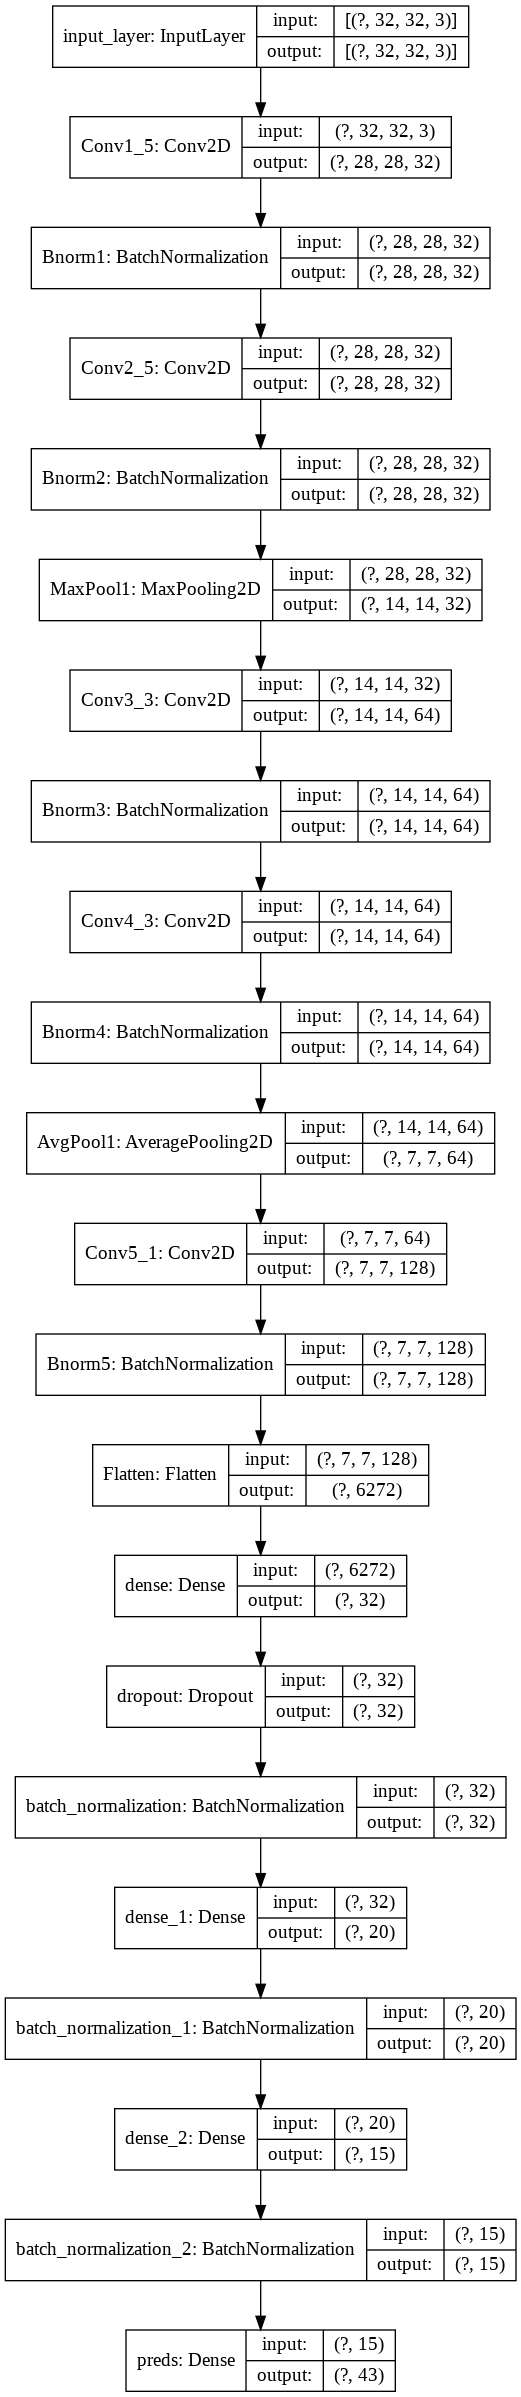

In [ ]:
plot_model(model, show_shapes=True)

## first model callbacks

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=1)
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'val_accuracy',
                               verbose=1, 
                               save_best_only=True)



## compile model

In [ ]:
sgd = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

## train model

In [ ]:
history = model.fit(x=trainX, y=trainY, batch_size=16, epochs=10, validation_data=(valX, valY), callbacks=[es , checkpointer])

Epoch 1/10
2175/2175 [==============================] - ETA: 0s - loss: 1.9829 - accuracy: 0.4332
Epoch 00001: val_accuracy improved from -inf to 0.81973, saving model to best_weights.hdf5
2175/2175 [==============================] - 14s 6ms/step - loss: 1.9829 - accuracy: 0.4332 - val_loss: 0.5624 - val_accuracy: 0.8197
Epoch 2/10
2173/2175 [============================>.] - ETA: 0s - loss: 0.6032 - accuracy: 0.8152
Epoch 00002: val_accuracy improved from 0.81973 to 0.90839, saving model to best_weights.hdf5
2175/2175 [==============================] - 13s 6ms/step - loss: 0.6029 - accuracy: 0.8153 - val_loss: 0.3394 - val_accuracy: 0.9084
Epoch 3/10
2173/2175 [============================>.] - ETA: 0s - loss: 0.3616 - accuracy: 0.8921
Epoch 00003: val_accuracy improved from 0.90839 to 0.94263, saving model to best_weights.hdf5
2175/2175 [==============================] - 13s 6ms/step - loss: 0.3614 - accuracy: 0.8921 - val_loss: 0.2202 - val_accuracy: 0.9426
Epoch 4/10
2170/2175 [===

## save model

In [ ]:
model.save('/content/drive/MyDrive/Signs Dataset/model1/')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Signs Dataset/model1/assets


## ploting model

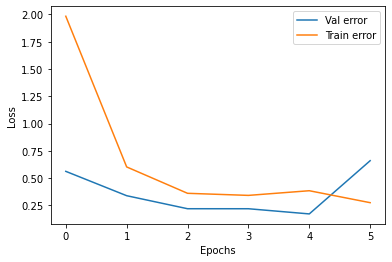

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('/content/drive/MyDrive/Signs Dataset/plots/first_model_val_loss')
plt.show()

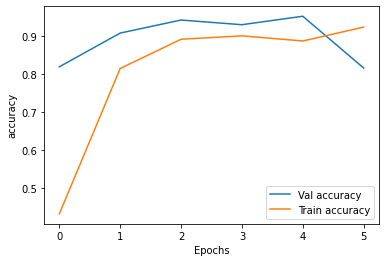

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='lower right')
plt.savefig('/content/drive/MyDrive/Signs Dataset/plots/first_model_val_accuracy')

plt.show()

## pass test data to trained model

In [ ]:
model.evaluate(x=testX, y=testY, batch_size=16)

790/790 [==============================] - 2s 3ms/step - loss: 0.6646 - accuracy: 0.8186


[0.6646101474761963, 0.8186064958572388]

# grayscaling data

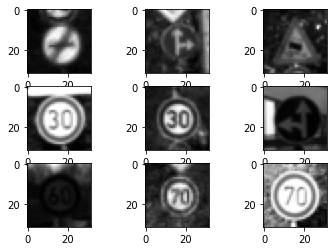

In [ ]:
from tensorflow.image import rgb_to_grayscale
gray_trainX = np.array(rgb_to_grayscale(trainX))
gray_testX = np.array(rgb_to_grayscale(testX))
gray_validX = np.array(rgb_to_grayscale(valX))
for i in range(9):
    img = gray_trainX[i*1000].reshape(32, 32)
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(img, cmap='gray')

# second neural network model

In [ ]:
input_model2 = Input((gray_trainX.shape[1],gray_trainX.shape[2],gray_trainX.shape[3]),name = 'input_layer')

model2 = Conv2D(32,(5,5), activation='relu',name = 'Conv1_5')(input_model2)
model2 = BatchNormalization(name = 'Bnorm1')(model2)
model2 = Conv2D(32,(5,5), activation='relu', padding='same',name= 'Conv2_5')(model2)
model2 = BatchNormalization(name = 'Bnorm2')(model2)
model2 = MaxPooling2D((2, 2),name = 'MaxPool1')(model2)
model2 = Conv2D(64,(3,3), activation='relu' ,padding='same',name = 'Conv3_3')(model2)
model2 = BatchNormalization(name = 'Bnorm3')(model2)
model2 = Conv2D(64,(3,3), activation='relu' ,padding='same',name = 'Conv4_3')(model2)
model2 = BatchNormalization(name = 'Bnorm4')(model2)
model2 = AveragePooling2D((2, 2),name = 'AvgPool1')(model2)
model2 = Conv2D(128,(1,1), activation='relu' ,padding='valid',name = 'Conv5_1')(model2)
model2 = BatchNormalization(name = 'Bnorm5')(model2)
########################################################
model2 = Flatten(name = 'Flatten')(model2)
########################################################
model2 = Dense(units = 32, activation = 'relu')(model2)
model2 = Dropout(rate = 0.2)(model2)
model2 = BatchNormalization()(model2)
model2 = Dense(units = 20, activation = 'relu')(model2)
model2 = BatchNormalization()(model2)
model2 = Dense(units = 15, activation = 'relu')(model2)
model2 = BatchNormalization()(model2)
output2 = Dense(units = 43, activation = 'softmax' , name='preds')(model2)

model2 = Model(inputs= [input_model2], outputs=[output2])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(x=gray_trainX, y=trainY, batch_size=16, epochs=10, validation_data=(gray_validX, valY))

Epoch 1/10
2175/2175 [==============================] - 13s 6ms/step - loss: 1.7382 - accuracy: 0.5508 - val_loss: 0.4943 - val_accuracy: 0.8429
Epoch 2/10
2175/2175 [==============================] - 13s 6ms/step - loss: 0.4933 - accuracy: 0.8592 - val_loss: 0.1954 - val_accuracy: 0.9431
Epoch 3/10
2175/2175 [==============================] - 13s 6ms/step - loss: 0.2637 - accuracy: 0.9268 - val_loss: 0.1347 - val_accuracy: 0.9615
Epoch 4/10
2175/2175 [==============================] - 13s 6ms/step - loss: 0.1879 - accuracy: 0.9472 - val_loss: 0.0974 - val_accuracy: 0.9710
Epoch 5/10
2175/2175 [==============================] - 13s 6ms/step - loss: 0.1366 - accuracy: 0.9605 - val_loss: 0.2747 - val_accuracy: 0.9263
Epoch 6/10
2175/2175 [==============================] - 13s 6ms/step - loss: 0.1206 - accuracy: 0.9657 - val_loss: 0.0698 - val_accuracy: 0.9776
Epoch 7/10
2175/2175 [==============================] - 13s 6ms/step - loss: 0.1012 - accuracy: 0.9701 - val_loss: 0.0752 - val_ac

## save model

In [ ]:
model2.save('/content/drive/MyDrive/Signs Dataset/model2/')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Signs Dataset/model2/assets


## ploting model

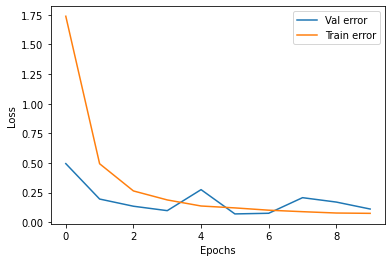

In [ ]:
val_loss = history2.history['val_loss']
loss = history2.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('/content/drive/MyDrive/Signs Dataset/plots/second_model_val_loss')
plt.show()

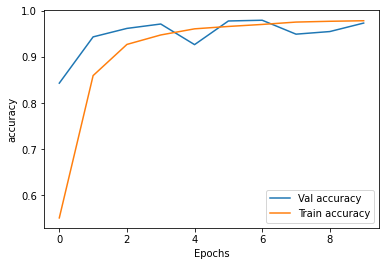

In [ ]:
val_accuracy = history2.history['val_accuracy']
accuracy = history2.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='lower right')
plt.savefig('/content/drive/MyDrive/Signs Dataset/plots/second_model_val_accuracy')

plt.show()

## pass test data to trained model

In [ ]:
model2.evaluate(x=gray_testX, y=testY, batch_size=16)

790/790 [==============================] - 2s 3ms/step - loss: 0.1801 - accuracy: 0.9615


[0.18008485436439514, 0.9615201950073242]

# check data distribution

In [69]:
train_distribution = []
for i in range(43):
  train_distribution.append(0)
for i in train['labels']:
  train_distribution[i] += 1
print("max: 2010")
need_data = []
for i in range(len(train_distribution)):
  print("class", i + 1, ":", train_distribution[i], "----->" , "need:", 2010 - train_distribution[i])
  need_data.append(2010 - train_distribution[i])


max: 2010
class 1 : 180 -----> need: 1830
class 2 : 1980 -----> need: 30
class 3 : 2010 -----> need: 0
class 4 : 1260 -----> need: 750
class 5 : 1770 -----> need: 240
class 6 : 1650 -----> need: 360
class 7 : 360 -----> need: 1650
class 8 : 1290 -----> need: 720
class 9 : 1260 -----> need: 750
class 10 : 1320 -----> need: 690
class 11 : 1800 -----> need: 210
class 12 : 1170 -----> need: 840
class 13 : 1890 -----> need: 120
class 14 : 1920 -----> need: 90
class 15 : 690 -----> need: 1320
class 16 : 540 -----> need: 1470
class 17 : 360 -----> need: 1650
class 18 : 990 -----> need: 1020
class 19 : 1080 -----> need: 930
class 20 : 180 -----> need: 1830
class 21 : 300 -----> need: 1710
class 22 : 270 -----> need: 1740
class 23 : 330 -----> need: 1680
class 24 : 450 -----> need: 1560
class 25 : 240 -----> need: 1770
class 26 : 1350 -----> need: 660
class 27 : 540 -----> need: 1470
class 28 : 210 -----> need: 1800
class 29 : 480 -----> need: 1530
class 30 : 240 -----> need: 1770
class 31 : 39

# create data to get equal distribution

In [72]:
classified_data = []
for i in range(43):
  classified_data.append([])
for j in range(len(train['features'])):
  classified_data[train['labels'][j]].append(train['features'][j])
for i in classified_data:
  print(len(i))

180
1980
2010
1260
1770
1650
360
1290
1260
1320
1800
1170
1890
1920
690
540
360
990
1080
180
300
270
330
450
240
1350
540
210
480
240
390
690
210
599
360
1080
330
180
1860
270
300
210
210


## create datagenerator

In [73]:
datagen = ImageDataGenerator(
        validation_split = 0.3,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

## create new data from random images

123
(1, 32, 32, 3)
182
(1, 32, 32, 3)
115
(1, 32, 32, 3)
168
(1, 32, 32, 3)
30
(1, 32, 32, 3)
54
(1, 32, 32, 3)
198
(1, 32, 32, 3)
22
(1, 32, 32, 3)
193
(1, 32, 32, 3)


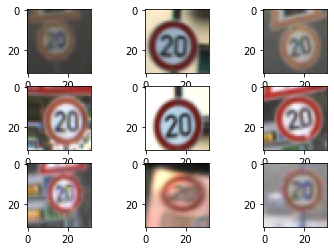

In [74]:
import random 
from datetime import datetime

random.seed(datetime.now())
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = datagen.flow(np.array([classified_data[0][random.randint(0, len(classified_data[0])) - 1]]), batch_size=1)
    print(random.randint(0, 200))
    # plot raw pixel data
    print(batch[0].shape)
    plt.imshow((batch[0][0]).astype(np.uint8))
    # plt.imshow(batch[0]z)


In [75]:
new_features = []
new_labels = []
for i in range(43):
  n = len(classified_data[i]) - 1
  m = need_data[i]
  print("class", i + 1)
  print("need", m)
  print("have", n + 1)
  print("--------")
  for j in range(m):
    batch = datagen.flow(np.array([classified_data[i][random.randint(0, n)]]), batch_size=1)[0]
    new_features.append(batch[0])
    new_labels.append(i)

class 1
need 1830
have 180
--------
class 2
need 30
have 1980
--------
class 3
need 0
have 2010
--------
class 4
need 750
have 1260
--------
class 5
need 240
have 1770
--------
class 6
need 360
have 1650
--------
class 7
need 1650
have 360
--------
class 8
need 720
have 1290
--------
class 9
need 750
have 1260
--------
class 10
need 690
have 1320
--------
class 11
need 210
have 1800
--------
class 12
need 840
have 1170
--------
class 13
need 120
have 1890
--------
class 14
need 90
have 1920
--------
class 15
need 1320
have 690
--------
class 16
need 1470
have 540
--------
class 17
need 1650
have 360
--------
class 18
need 1020
have 990
--------
class 19
need 930
have 1080
--------
class 20
need 1830
have 180
--------
class 21
need 1710
have 300
--------
class 22
need 1740
have 270
--------
class 23
need 1680
have 330
--------
class 24
need 1560
have 450
--------
class 25
need 1770
have 240
--------
class 26
need 660
have 1350
--------
class 27
need 1470
have 540
--------
class 28
need 

In [78]:
dist_features = []
for i in train['features']:
  dist_features.append(i)
for i in new_features:
  dist_features.append(i)

dist_labels = []
for i in train['labels']:
  dist_labels.append(i)
for i in new_labels:
  dist_labels.append(i)


## new distribution

In [80]:
train_distribution = []
for i in range(43):
  train_distribution.append(0)
for i in dist_labels:
  train_distribution[i] += 1
print(pd.DataFrame(train_distribution))

       0
0   2010
1   2010
2   2010
3   2010
4   2010
5   2010
6   2010
7   2010
8   2010
9   2010
10  2010
11  2010
12  2010
13  2010
14  2010
15  2010
16  2010
17  2010
18  2010
19  2010
20  2010
21  2010
22  2010
23  2010
24  2010
25  2010
26  2010
27  2010
28  2010
29  2010
30  2010
31  2010
32  2010
33  2010
34  2010
35  2010
36  2010
37  2010
38  2010
39  2010
40  2010
41  2010
42  2010


In [81]:
dist_labels = to_categorical(dist_labels)
print(np.array(dist_labels).shape)  

(86430, 43)


# train model with new data

In [82]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=np.array(dist_features), y=np.array(dist_labels), batch_size=16, epochs=10, validation_data=(valX, valY))

Epoch 1/10
5402/5402 [==============================] - 34s 6ms/step - loss: 0.2579 - accuracy: 0.9225 - val_loss: 0.0629 - val_accuracy: 0.9814
Epoch 2/10
5402/5402 [==============================] - 33s 6ms/step - loss: 0.1179 - accuracy: 0.9650 - val_loss: 0.0424 - val_accuracy: 0.9893
Epoch 3/10
5402/5402 [==============================] - 33s 6ms/step - loss: 0.0926 - accuracy: 0.9727 - val_loss: 0.0283 - val_accuracy: 0.9927
Epoch 4/10
5402/5402 [==============================] - 33s 6ms/step - loss: 0.0745 - accuracy: 0.9780 - val_loss: 0.0544 - val_accuracy: 0.9868
Epoch 5/10
5402/5402 [==============================] - 33s 6ms/step - loss: 0.0781 - accuracy: 0.9776 - val_loss: 0.0401 - val_accuracy: 0.9921
Epoch 6/10
5402/5402 [==============================] - 34s 6ms/step - loss: 0.0665 - accuracy: 0.9810 - val_loss: 0.0381 - val_accuracy: 0.9889
Epoch 7/10
5402/5402 [==============================] - 33s 6ms/step - loss: 0.0596 - accuracy: 0.9827 - val_loss: 0.0518 - val_ac

 ## save new model

In [83]:
model.save('/content/drive/MyDrive/Signs Dataset/model3/')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Signs Dataset/model3/assets


## ploting new model

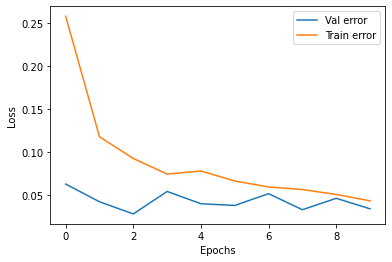

In [84]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('/content/drive/MyDrive/Signs Dataset/plots/Third_model_val_loss')
plt.show()

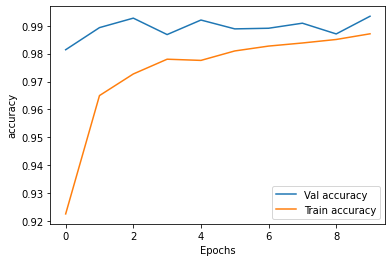

In [85]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='lower right')
plt.savefig('/content/drive/MyDrive/Signs Dataset/plots/Third_model_val_accuracy')

plt.show()

## pass test to third model

In [86]:
model.evaluate(x=testX, y=testY, batch_s ize=16)

790/790 [==============================] - 2s 3ms/step - loss: 0.0992 - accuracy: 0.9797


[0.0991794541478157, 0.9797307848930359]

# convolution layers output

(32, 32, 3)
(32, 32, 3)


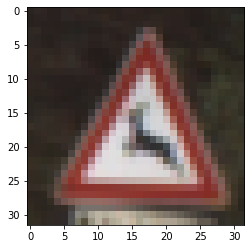

In [95]:
img = trainX[500]
print(img.shape)
img = img
print(img.shape)
plt.imshow(img)

layer : Conv1_5 , feature map shape : (1, 28, 28, 32)
nrow : 4 , ncol : 8


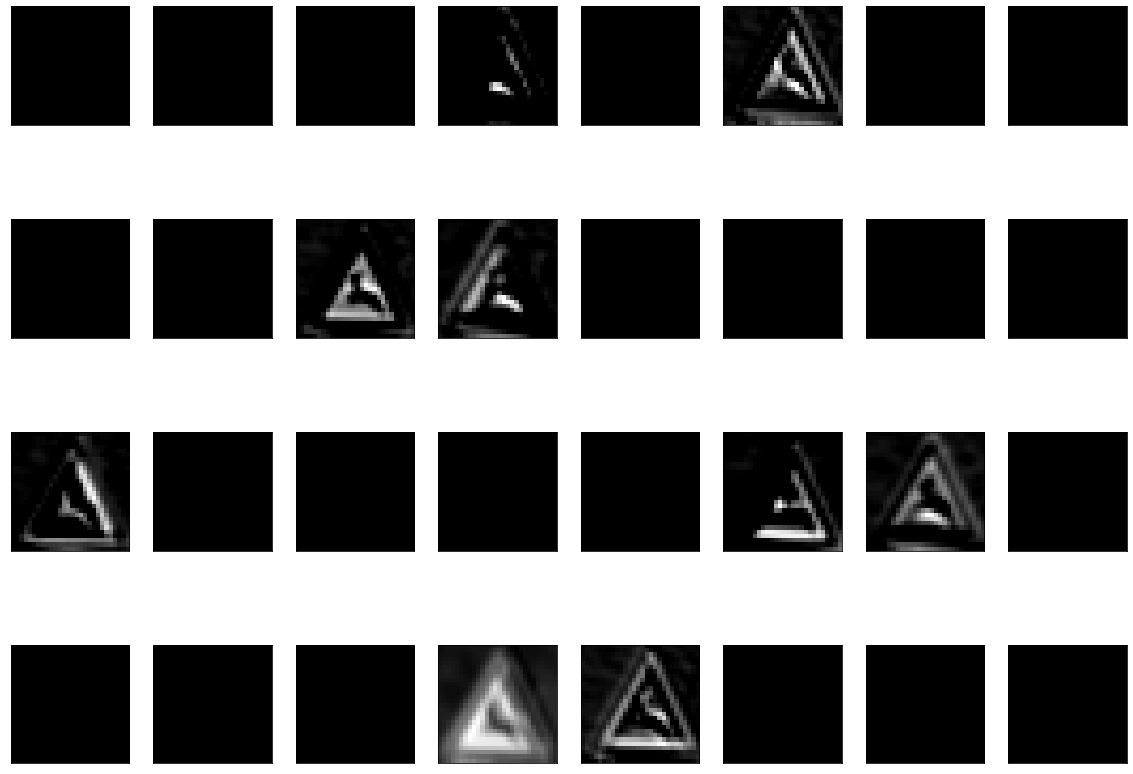

layer : Bnorm1 , feature map shape : (1, 28, 28, 32)
nrow : 4 , ncol : 8


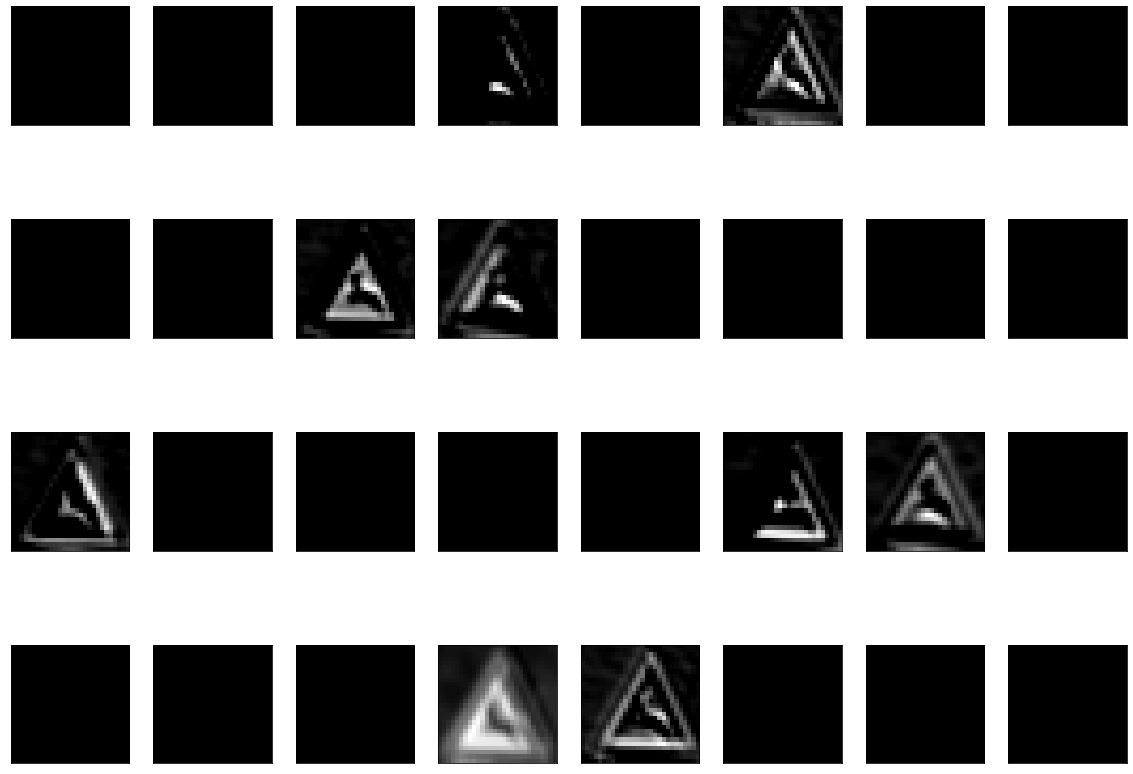

layer : Conv2_5 , feature map shape : (1, 28, 28, 32)
nrow : 4 , ncol : 8


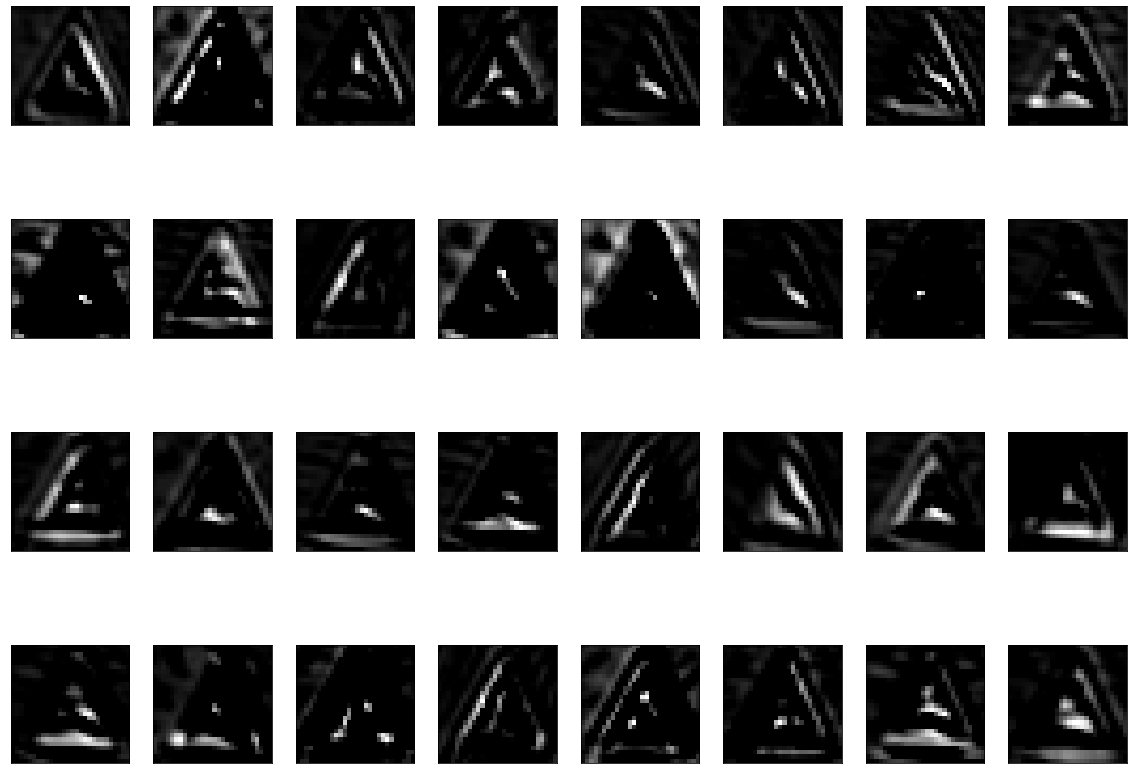

layer : Bnorm2 , feature map shape : (1, 28, 28, 32)
nrow : 4 , ncol : 8


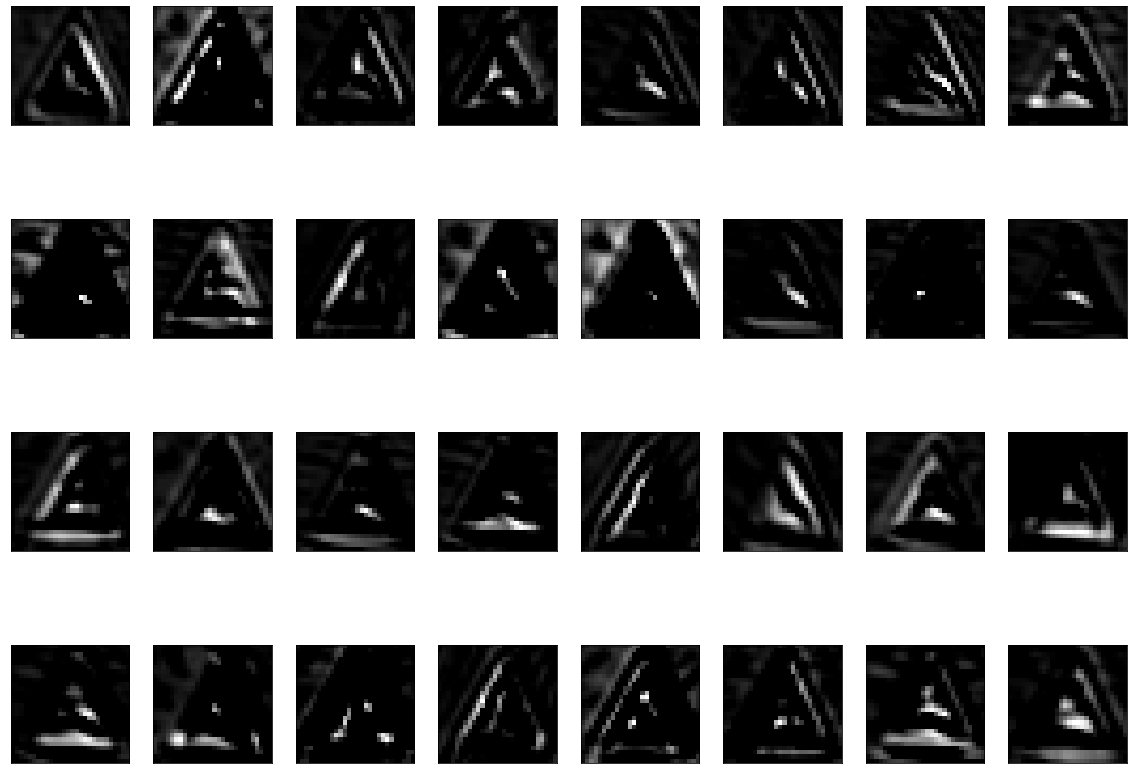

layer : MaxPool1 , feature map shape : (1, 14, 14, 32)
nrow : 4 , ncol : 8


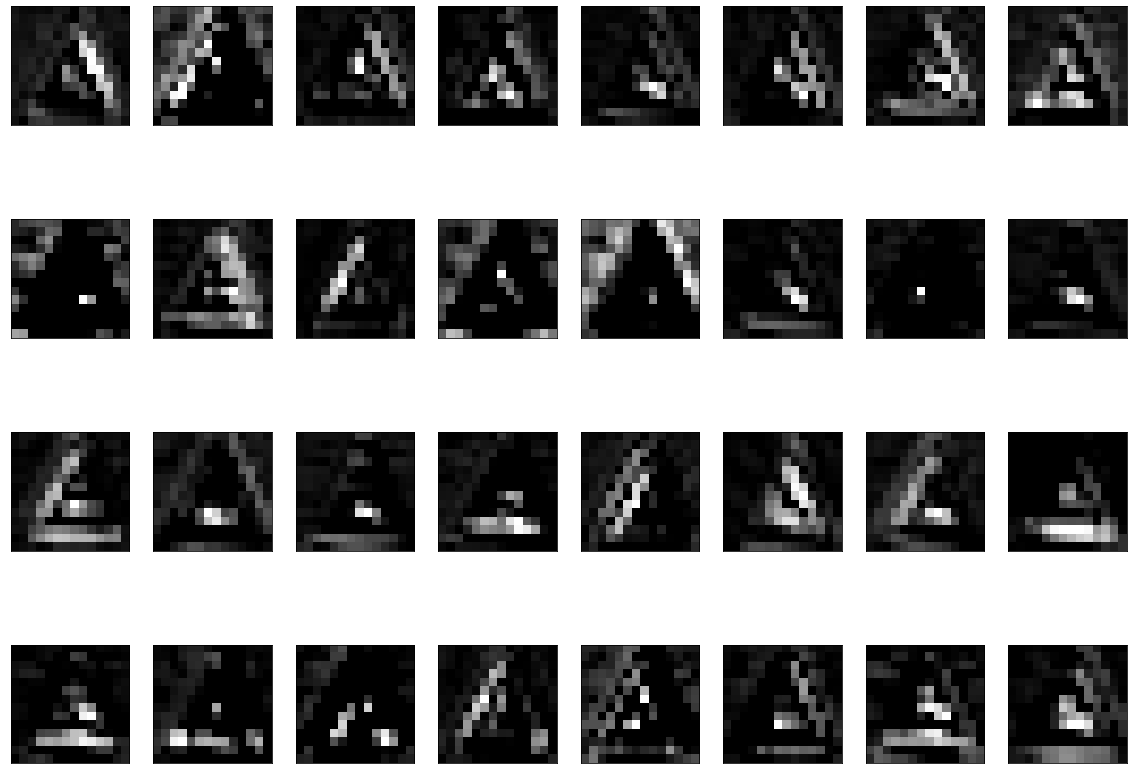

layer : Conv3_3 , feature map shape : (1, 14, 14, 64)
nrow : 8 , ncol : 8


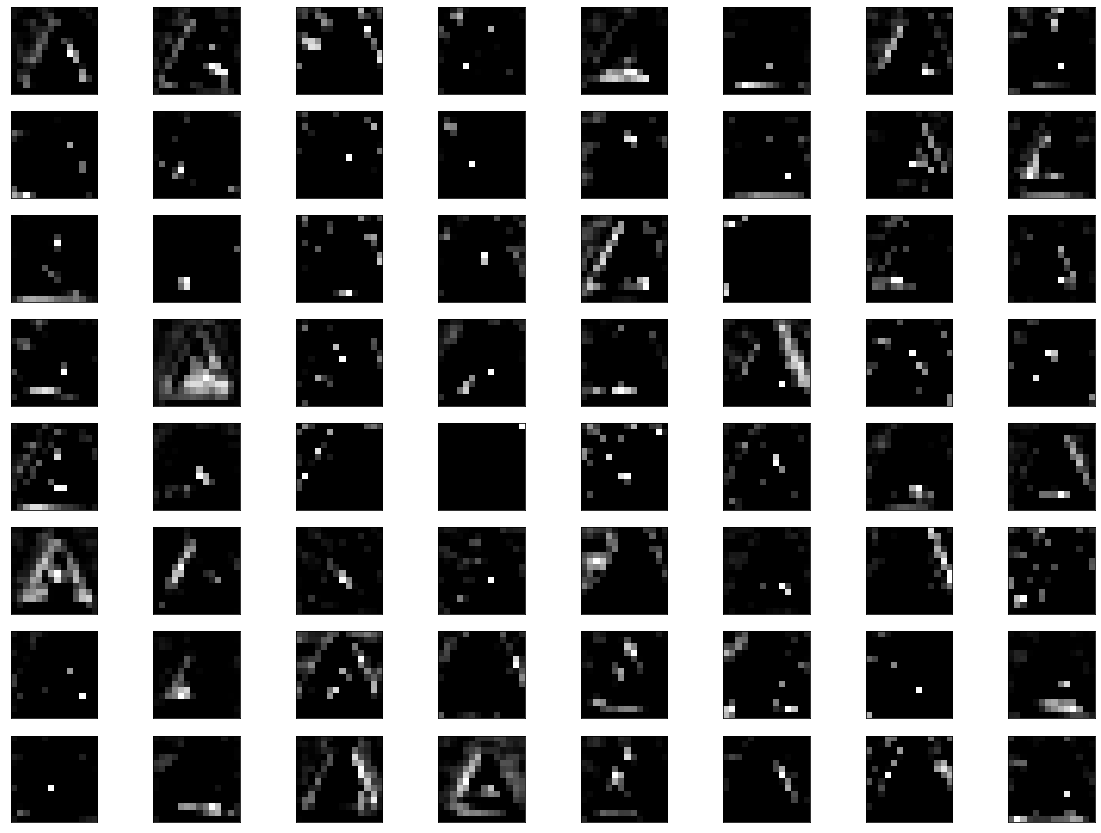

layer : Bnorm3 , feature map shape : (1, 14, 14, 64)
nrow : 8 , ncol : 8


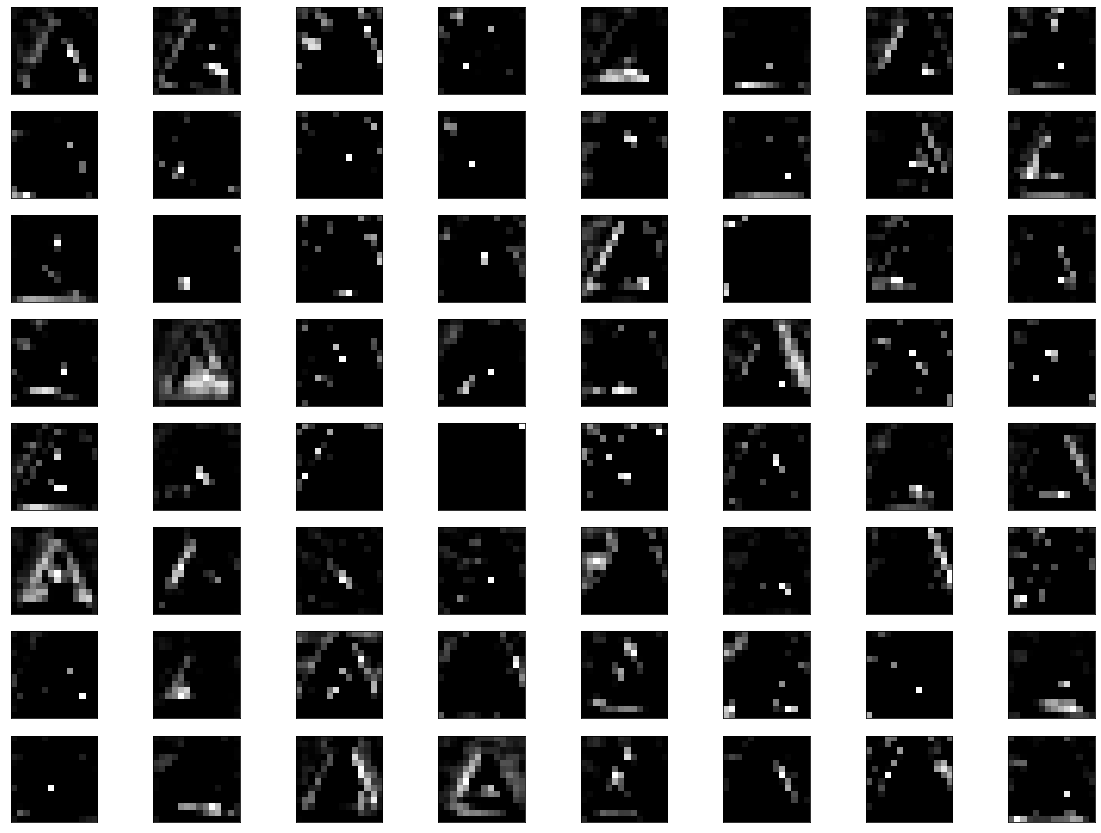

layer : Conv4_3 , feature map shape : (1, 14, 14, 64)
nrow : 8 , ncol : 8


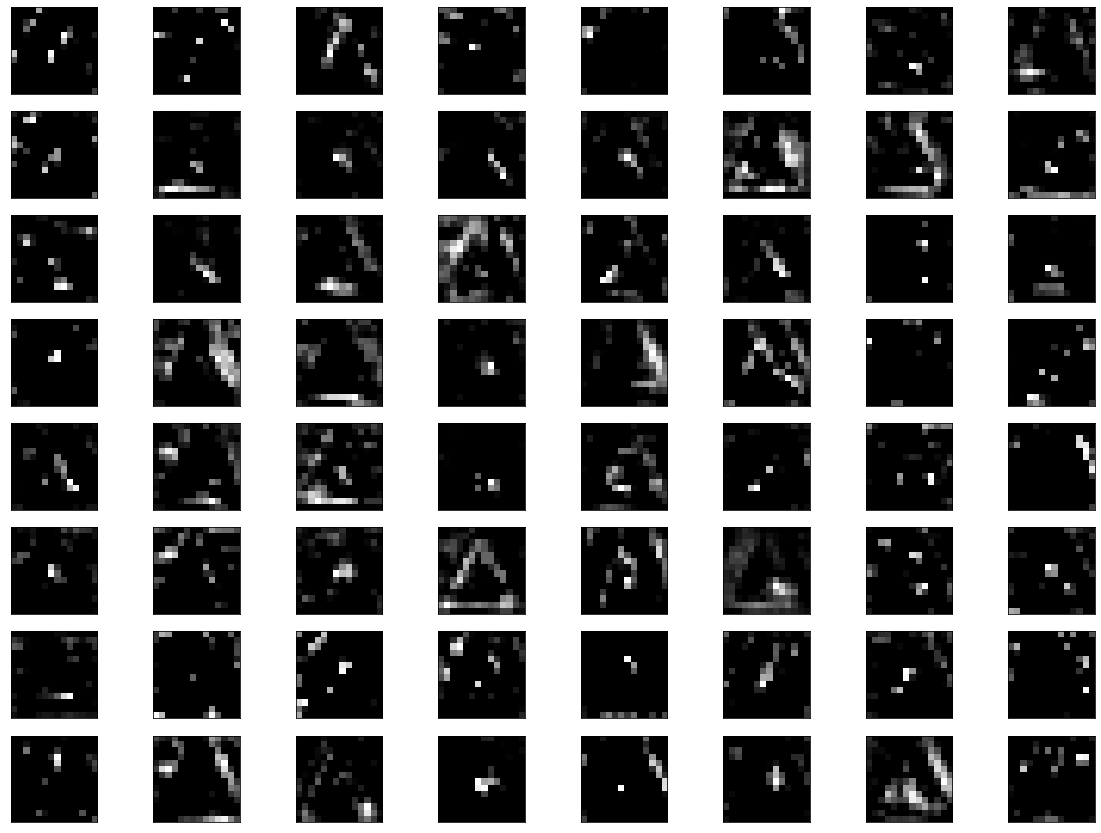

layer : Bnorm4 , feature map shape : (1, 14, 14, 64)
nrow : 8 , ncol : 8


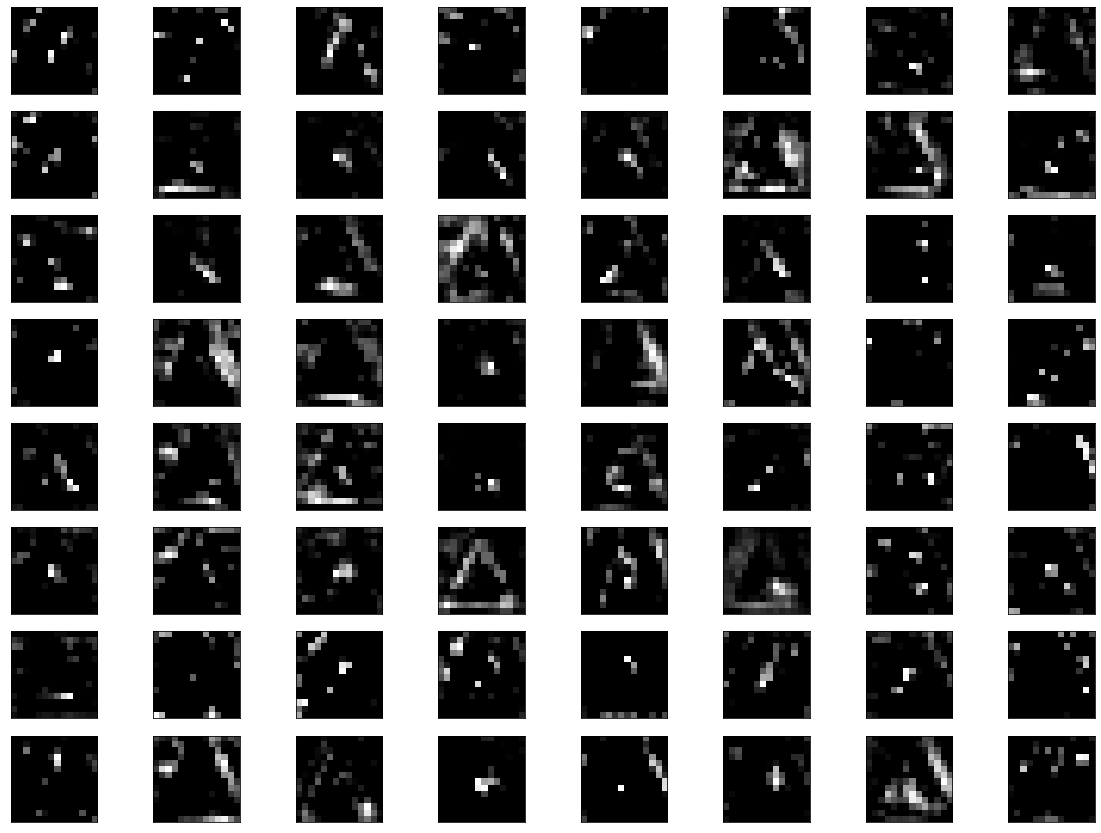

layer : AvgPool1 , feature map shape : (1, 7, 7, 64)
nrow : 8 , ncol : 8


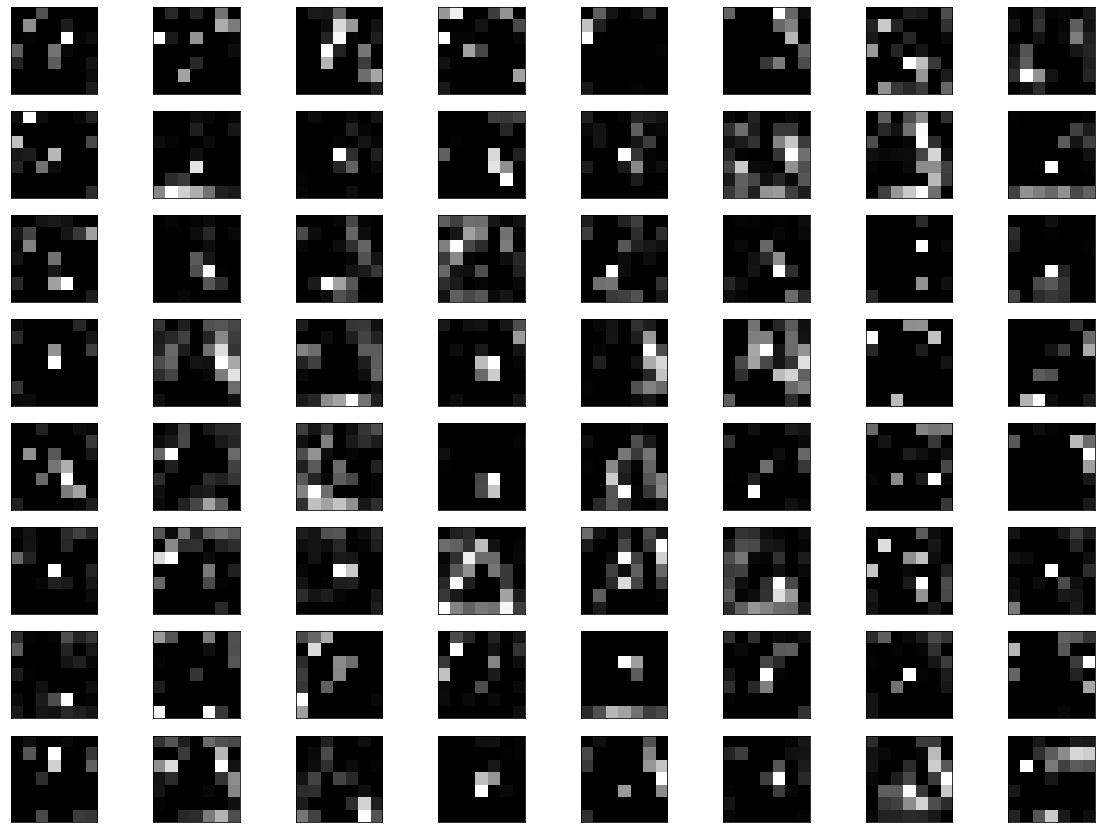

layer : Conv5_1 , feature map shape : (1, 7, 7, 128)
nrow : 16 , ncol : 8


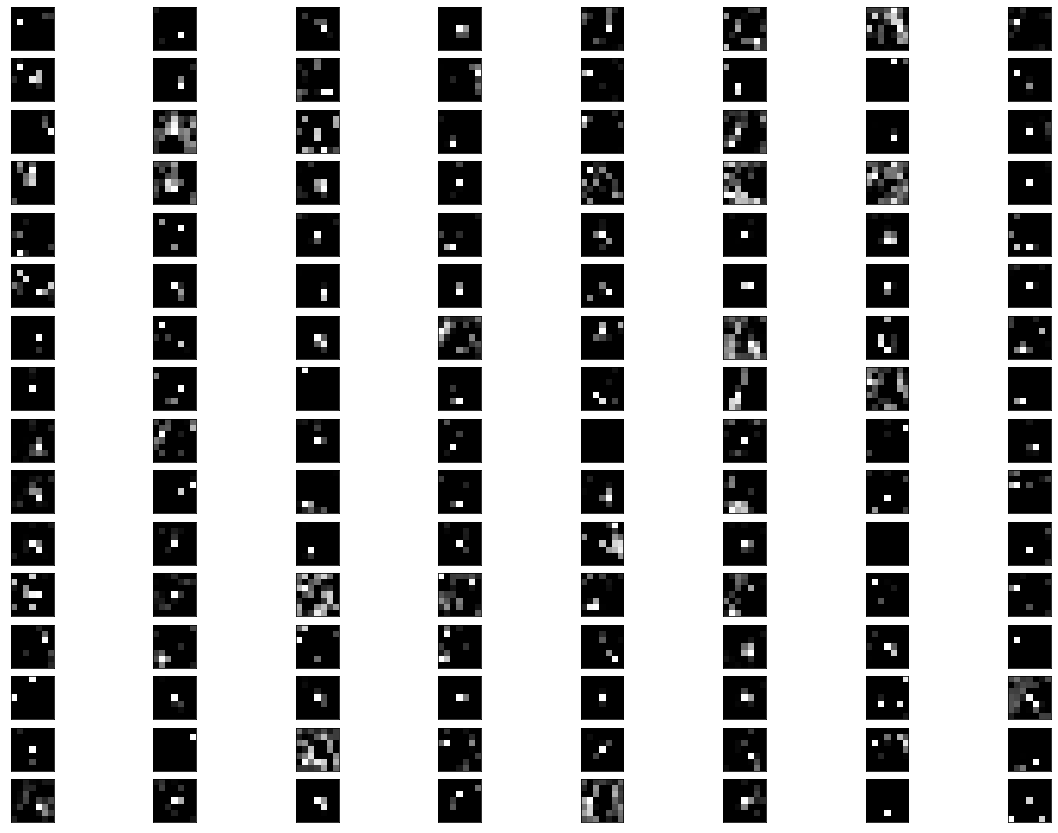

layer : Bnorm5 , feature map shape : (1, 7, 7, 128)
nrow : 16 , ncol : 8


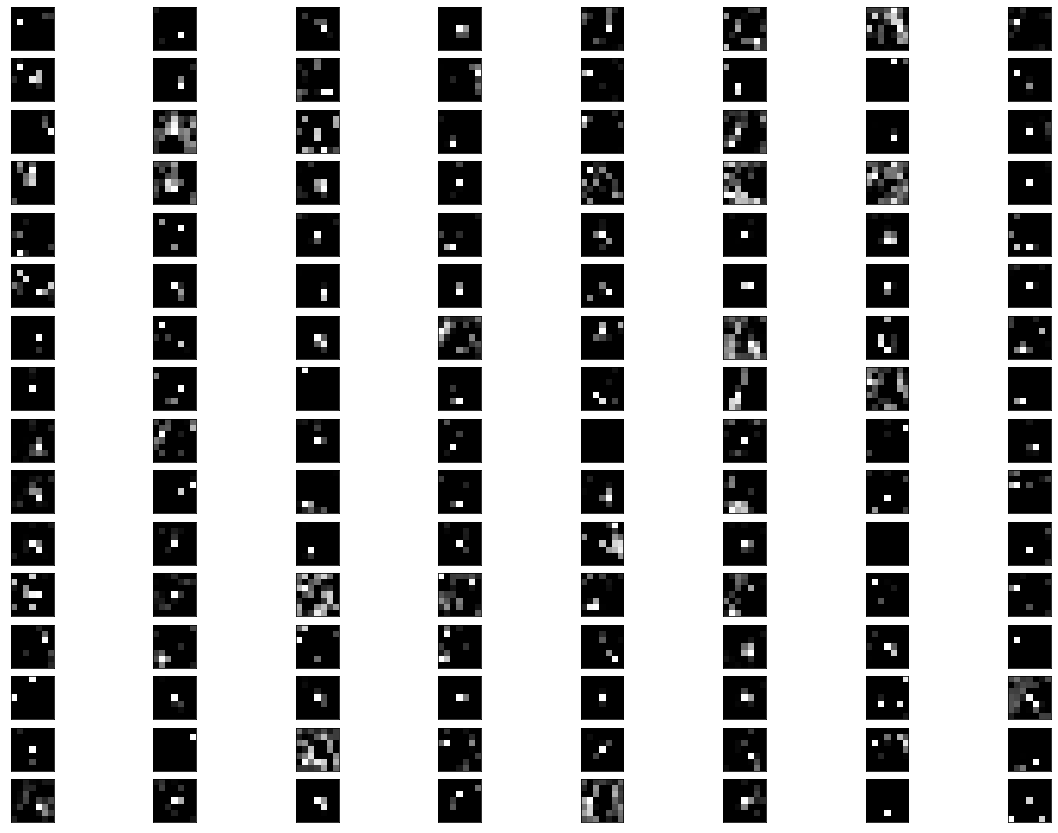

In [97]:
for n_layer in range(1,13):
  model_layer = Model(inputs=model.inputs, outputs=model.layers[n_layer].output)
  feature_maps = model_layer.predict(np.array([trainX[500]]))
  print('layer : {} , feature map shape : {}'.format(model.layers[n_layer].name,feature_maps.shape))

  n_row = int(feature_maps.shape[-1]/8)
  n_col = 8
  print('nrow : {} , ncol : {}'.format(n_row,n_col))
  plt.figure(figsize=(20,15))
  # plot all maps in an shape/8 * 8 squares
  ix = 1
  for _ in range(n_row):
	  for _ in range(n_col):
		  # specify subplot and turn of axis
		  ax = plt.subplot(n_row, n_col, ix)
		  ax.set_xticks([])
		  ax.set_yticks([])
		  # plot filter channel in grayscale
		  plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		  ix += 1
  # show the figure
  plt.show()